In [1]:
## Packages
library(dplyr)
library(stringr)
library(broom)
library(ggplot2)
library(tidyr)


Warning message:
“package ‘dplyr’ was built under R version 4.0.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘broom’ was built under R version 4.0.2”
Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”


In [3]:
## Read data in, change path as necessary

# One line per election
elections_2016 <- read.csv("2016_election_results_wide.csv")

# One line per candidate
elections_2016_long <- read.csv("2016_election_results_long.csv")

# One line per election
elections_2018 <- read.csv("2018_election_results_wide.csv")

# One line per candidate
elections_2018_long <- read.csv("2018_election_results_long.csv")

head(elections_2016)
head(elections_2016_long)
head(elections_2018)
head(elections_2018_long)


,X,democrat,republican,other,state,year,district,democrat_incumbent,democrat_votes,republican_incumbent,republican_votes,other_incumbent,other_votes,gender_dem,gender_rep,winner_party,winner_gender,vote_prop_dem,vote_prop_rep,vote_prop_other
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1,Scott J. Kawasaki,No candidate,No candidate,Alaska,2016,1,True,1,False,0,0,0,male,N/A,Democrat,male,1.00000000,0.0000000,0.0000000
2,2,Truno Holdaway,Steve M. Thompson,No candidate,Alaska,2016,2,False,1153,True,3268,0,0,Unknown,male,Republican,male,0.26080072,0.7391993,0.0000000
3,3,Christina M. Sinclair,Tammie Wilson,Jeanne Olson,Alaska,2016,3,False,537,True,4291,False,2270,female,female,Republican,female,0.07565511,0.6045365,0.3198084
4,4,David Guttenberg,No candidate,No candidate,Alaska,2016,4,True,1,False,0,0,0,male,N/A,Democrat,male,1.00000000,0.0000000,0.0000000
5,5,Adam Wool,Aaron Lojewski,No candidate,Alaska,2016,5,True,3812,False,3384,0,0,male,male,Democrat,male,0.52973874,0.4702613,0.0000000
6,6,Jason T. Land,David M. Talerico,No candidate,Alaska,2016,6,False,2327,True,5126,0,0,male,male,Republican,male,0.31222327,0.6877767,0.0000000


,X,candidate,state,district,year,incumbent,total_votes,vote_prop,gender,winner_party,candidate_party,race_ethnicity
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,1,Scott J. Kawasaki,Alaska,1,2016,True,1,1.00000000,male,Democrat,Democrat,Missing
2,2,Truno Holdaway,Alaska,2,2016,False,1153,0.26080072,Unknown,Republican,Democrat,Missing
3,3,Christina M. Sinclair,Alaska,3,2016,False,537,0.07565511,female,Republican,Democrat,Missing
4,4,David Guttenberg,Alaska,4,2016,True,1,1.00000000,male,Democrat,Democrat,Missing
5,5,Adam Wool,Alaska,5,2016,True,3812,0.52973874,male,Democrat,Democrat,Missing
6,6,Jason T. Land,Alaska,6,2016,False,2327,0.31222327,male,Republican,Democrat,Missing


,X,state,district,office,candidate_other,candidate_republican,candidate_democrat,total_votes_other,total_votes_republican,total_votes_democrat,vote_share_dem,vote_share_rep,vote_share_other,winner_party,gender_democrat,gender_republican,winner_gender,year
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,1,Alabama,District 1,State Representative,Bobby James Dolan III,Phillip Pettus,No candidate,4336,7348,0,0.0000000,0.6288942,0.37110579,Republican,N/A,male,male,2018
2,2,Alabama,District 1,State Senator,No candidate,Tim Melson,Caroline Self,0,33141,15830,0.3232525,0.6767475,0.00000000,Republican,female,male,male,2018
3,3,Alabama,District 10,State Representative,Elijah J. Boyd,Mike Ball,J.B. King,1130,11240,8565,0.4091235,0.5368999,0.05397659,Republican,Unknown,male,male,2018
4,4,Alabama,District 10,State Senator,Craig Ford,Andrew Jones,No candidate,16759,25902,0,0.0000000,0.6071588,0.39284124,Republican,N/A,male,male,2018
5,5,Alabama,District 100,State Representative,No candidate,Victor Gaston,No candidate,0,12086,0,0.0000000,1.0000000,0.00000000,Republican,N/A,male,male,2018
6,6,Alabama,District 101,State Representative,No candidate,Chris Pringle,No candidate,0,10274,0,0.0000000,1.0000000,0.00000000,Republican,N/A,male,male,2018


,X,year,state,district,office,candidate,total_votes,vote_prop,gender,winner_party,candidate_party,race_ethnicity
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,1,2018,Alabama,District 1,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing
2,2,2018,Alabama,District 1,State Senator,Caroline Self,15830,0.3232525,female,Republican,Democrat,Missing
3,3,2018,Alabama,District 10,State Representative,J.B. King,8565,0.4091235,Unknown,Republican,Democrat,Missing
4,4,2018,Alabama,District 10,State Senator,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing
5,5,2018,Alabama,District 100,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing
6,6,2018,Alabama,District 101,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat,Missing


In [15]:
## Add regions in
## Region generator
# Need to manually change states depending on form, e.g. RI/Rhode Island/RHODE ISLAND

states_northeast <- c("Connecticut", "Maine", "Massachusetts",
                      "New Hampshire", "New Jersey", "New York", "Pennsylvania", 
                      "Rhode Island", "Vermont")
states_west <- c("Alaska", "Arizona", "California", "Colorado", "Hawaii", "Idaho", "Montana", "Nevada", 
                 "New Mexico", "Oregon", "Utah", "Washington", "Wyoming")
states_midwest <- c("Indiana", "Illinois", "Iowa", "Kansas", "Michigan", "Minnesota", "Missouri", 
                    "Nebraska", "North Dakota", "Ohio", "South Dakota", "Wisconsin")
states_south <- c("Alabama", "Arkansas", "Delaware", "District of Columbia", 
                  "Florida", "Georgia", "Kentucky", "Louisiana", "Maryland", "Mississippi", 
                  "North Carolina", "Oklahoma", "South Carolina", "Tennessee", "Texas", 
                  "Virginia", "West Virginia")
elections_2016 <- elections_2016 %>%
  mutate(region = case_when(state %in% states_northeast ~ "Northeast",
                            state %in% states_west ~ "West",
                            state %in% states_midwest ~ "Midwest",
                            state %in% states_south ~ "South",
                            TRUE ~ "Other"))

elections_2016_long <- elections_2016_long %>%
  mutate(region = case_when(state %in% states_northeast ~ "Northeast",
                            state %in% states_west ~ "West",
                            state %in% states_midwest ~ "Midwest",
                            state %in% states_south ~ "South",
                            TRUE ~ "Other"))

elections_2018 <- elections_2018 %>%
  mutate(region = case_when(state %in% states_northeast ~ "Northeast",
                            state %in% states_west ~ "West",
                            state %in% states_midwest ~ "Midwest",
                            state %in% states_south ~ "South",
                            TRUE ~ "Other"))

elections_2018_long <- elections_2018_long %>%
  mutate(region = case_when(state %in% states_northeast ~ "Northeast",
                            state %in% states_west ~ "West",
                            state %in% states_midwest ~ "Midwest",
                            state %in% states_south ~ "South",
                            TRUE ~ "Other"))


`summarise()` regrouping output by 'year' (override with `.groups` argument)

`summarise()` regrouping output by 'year' (override with `.groups` argument)



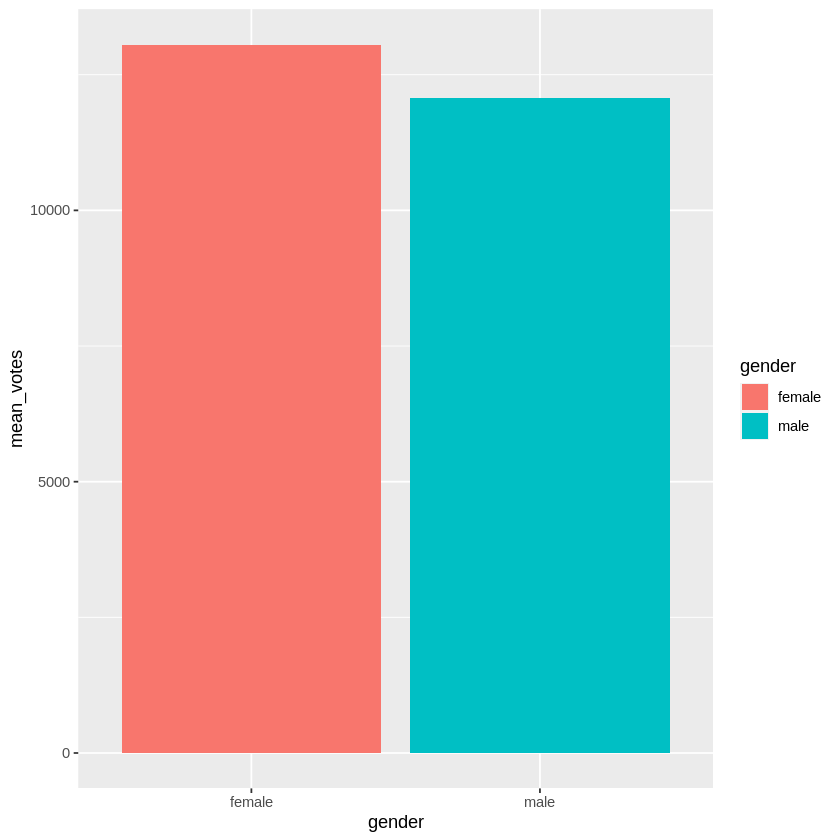

`summarise()` ungrouping output (override with `.groups` argument)



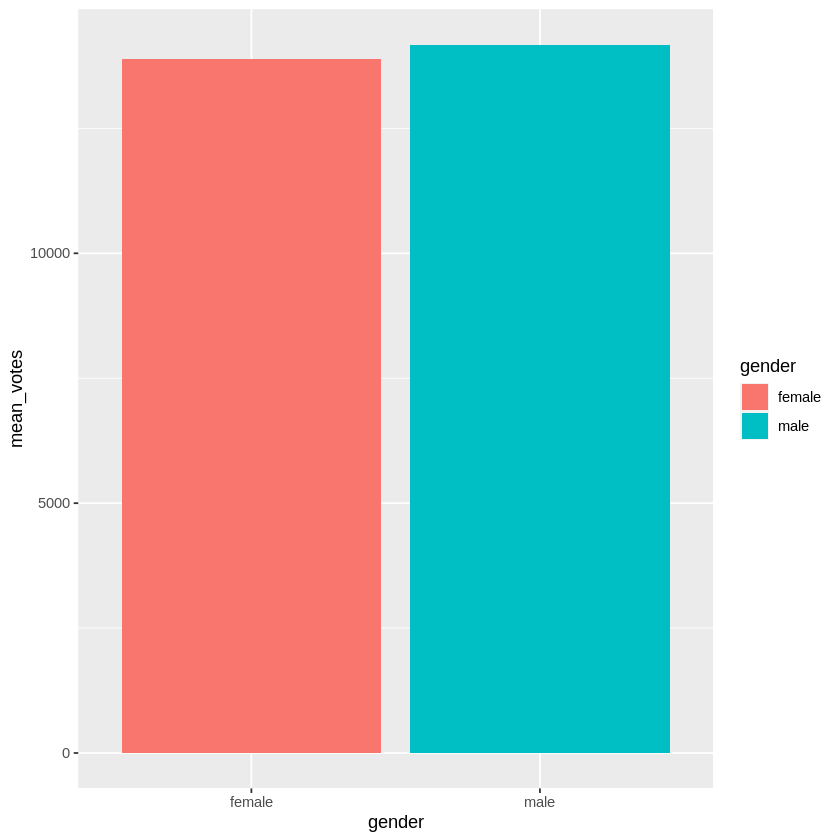

`summarise()` ungrouping output (override with `.groups` argument)



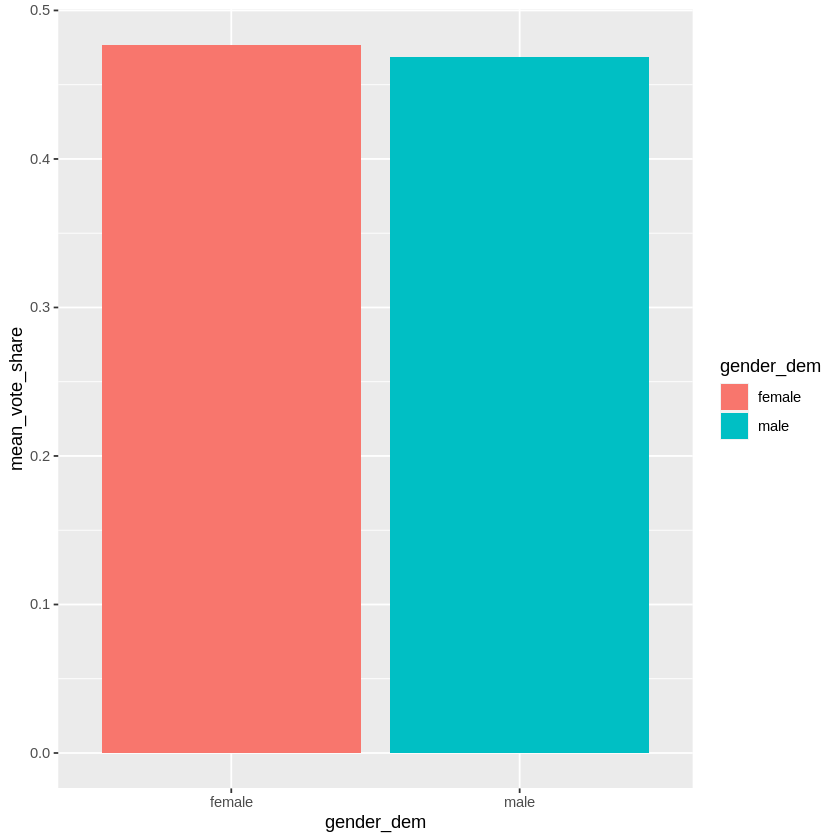

`summarise()` regrouping output by 'candidate_party' (override with `.groups` argument)



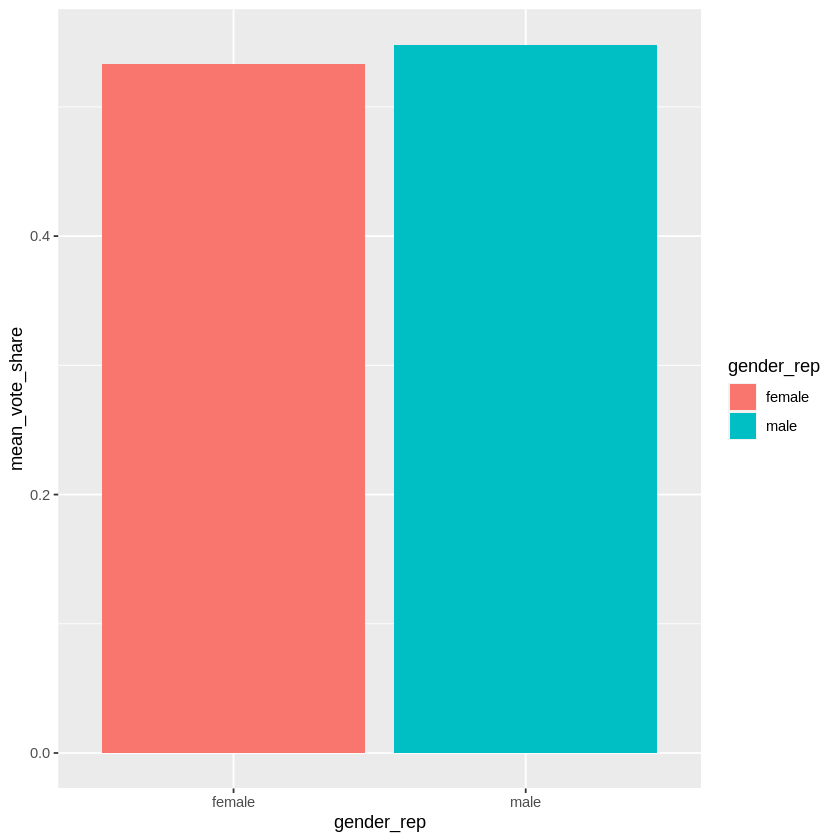

`summarise()` regrouping output by 'candidate_party' (override with `.groups` argument)



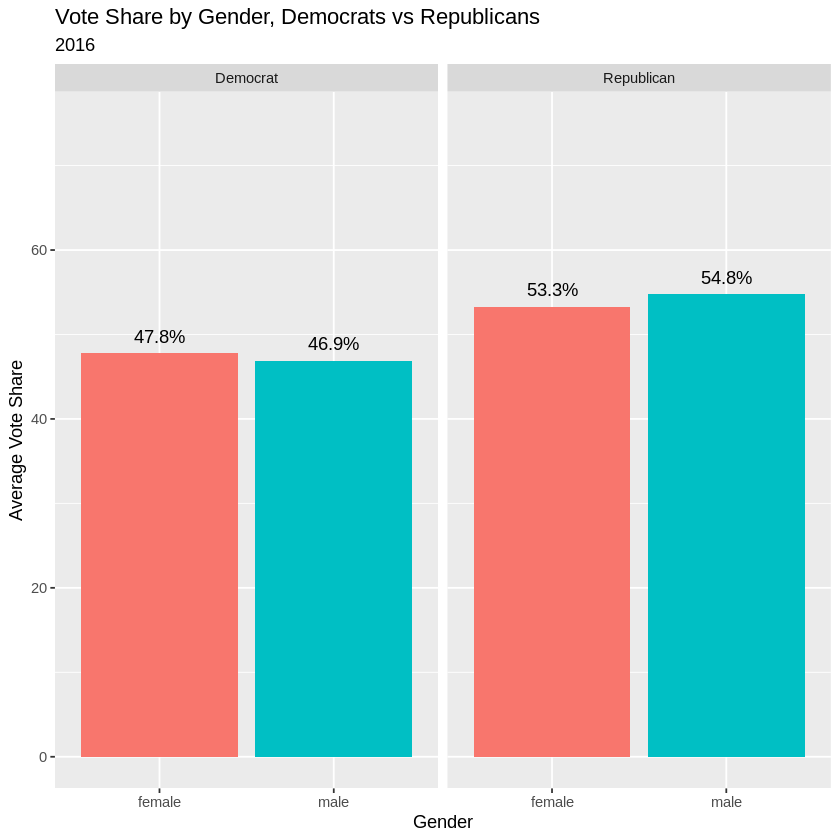

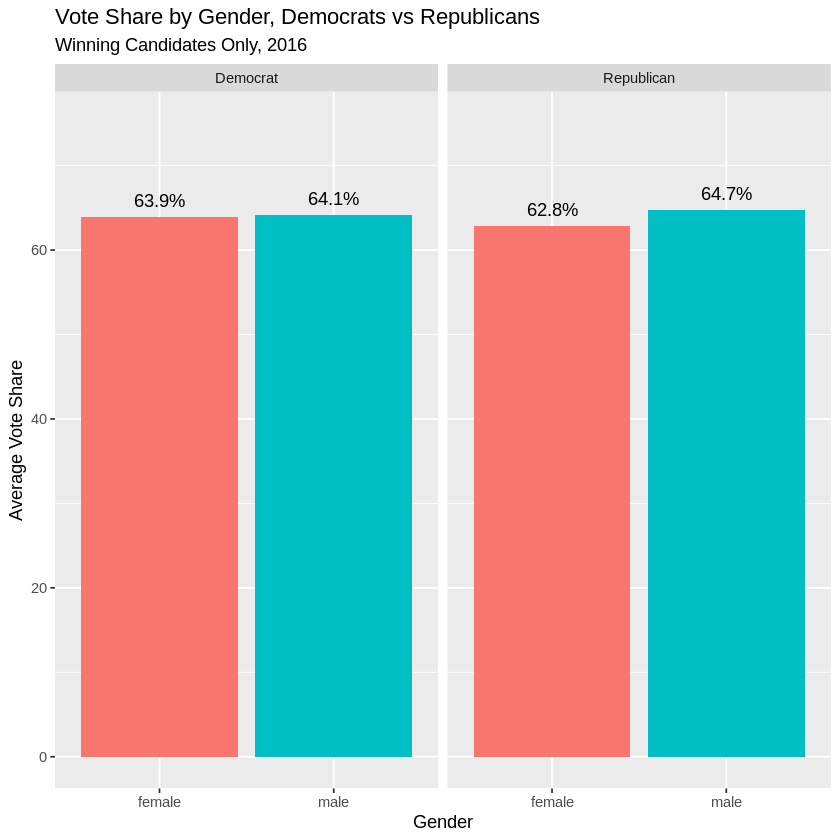

In [16]:
## Basic descriptives for 2016, separated by party

elections_2016_long %>%
    filter(candidate_party == "Democrat", gender %in% c("male", "female"), !is.na(total_votes)) %>%
    group_by(year, gender) %>%
    summarize(mean_votes = mean(total_votes)) %>%

    ggplot(aes(x = gender, y = mean_votes, fill = gender)) + 
        geom_bar(stat = "identity")


elections_2016_long %>%
    filter(candidate_party == "Republican", gender %in% c("male", "female"), !is.na(total_votes)) %>%
    group_by(year, gender) %>%
    summarize(mean_votes = mean(total_votes)) %>%
    ggplot(aes(x = gender, y = mean_votes, fill = gender)) + 
        geom_bar(stat = "identity")


elections_2016 %>%
    group_by(gender_dem) %>%
    filter(gender_dem %in% c("male", "female"), !is.na(vote_prop_dem), !vote_prop_dem == 1) %>%
    summarize(count = n(),
              mean_vote_share = mean(vote_prop_dem)) %>%
    ggplot(aes(x = gender_dem, y = mean_vote_share, fill = gender_dem)) + 
        geom_bar(stat = "identity")


elections_2016 %>%
    group_by(gender_rep) %>%
    filter(gender_rep %in% c("male", "female"), !is.na(vote_prop_rep), !vote_prop_rep == 1) %>%
    summarize(count = n(),
              mean_vote_share = mean(vote_prop_rep)) %>% 
    ggplot(aes(x = gender_rep, y = mean_vote_share, fill = gender_rep)) + 
        geom_bar(stat = "identity")


elections_2016_long %>%
    filter(gender %in% c("male", "female"), !is.na(vote_prop), vote_prop != 1) %>%
    group_by(candidate_party, gender) %>%
    summarize(avg_vote_prop = round(100*mean(vote_prop),1)) %>%
    ggplot(aes(x = gender, y = avg_vote_prop, fill = gender, label = paste(avg_vote_prop, "%", sep = ""))) + 
        geom_bar(stat = "identity") +
        geom_text(position = position_nudge(0,2)) + 
        facet_grid(. ~ candidate_party) +
        ylim(0,75) + 
        labs(title = "Vote Share by Gender, Democrats vs Republicans",
             subtitle = "2016",
            x = "Gender",
            y = "Average Vote Share") +
        theme(legend.position = "none")


elections_2016_long %>%
    filter(gender %in% c("male", "female"), !is.na(vote_prop), vote_prop != 1, candidate_party == winner_party) %>%
    group_by(candidate_party, gender) %>%
    summarize(avg_vote_prop = round(100*mean(vote_prop),1)) %>%
    ggplot(aes(x = gender, y = avg_vote_prop, fill = gender, label = paste(avg_vote_prop, "%", sep = ""))) + 
        geom_bar(stat = "identity") +
        geom_text(position = position_nudge(0,2)) + 
        facet_grid(. ~ candidate_party) +
        ylim(0,75) + 
        labs(title = "Vote Share by Gender, Democrats vs Republicans",
             subtitle = "Winning Candidates Only, 2016",
            x = "Gender",
            y = "Average Vote Share") +
        theme(legend.position = "none")



`summarise()` regrouping output by 'state' (override with `.groups` argument)



state,winner_gender,count,prop
<chr>,<chr>,<int>,<dbl>
Alaska,female,9,0.4090909
Alaska,male,13,0.5909091
Arkansas,female,4,0.1739130
Arkansas,male,19,0.8260870
California,female,13,0.2280702
California,male,44,0.7719298


`summarise()` regrouping output by 'region', 'state' (override with `.groups` argument)



region,state,female,male,diff
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Midwest,Illinois,0.46808511,0.5319149,0.06382979
West,Nevada,0.43750000,0.5625000,0.12500000
West,Colorado,0.41176471,0.5882353,0.17647059
West,Alaska,0.40909091,0.5909091,0.18181818
Northeast,Rhode Island,0.39130435,0.6086957,0.21739130
Midwest,Minnesota,0.36507937,0.6269841,0.26190476
West,Washington,0.36734694,0.6326531,0.26530612
Northeast,Maine,0.35772358,0.6260163,0.26829268
West,Idaho,0.36585366,0.6341463,0.26829268


`summarise()` regrouping output by 'region', 'state' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



region,avg_diff
<chr>,<dbl>
South,0.5346283
Northeast,0.4049463
Midwest,0.4026670
West,0.3779722


`summarise()` regrouping output by 'region', 'state' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



[1] "X"                      "state"                  "district"              
 [4] "office"                 "candidate_other"        "candidate_republican"  
 [7] "candidate_democrat"     "total_votes_other"      "total_votes_republican"
[10] "total_votes_democrat"   "vote_share_dem"         "vote_share_rep"        
[13] "vote_share_other"       "winner_party"           "gender_democrat"       
[16] "gender_republican"      "winner_gender"          "year"                  
[19] "region"

[1] "X"               "year"            "state"           "district"       
 [5] "office"          "candidate"       "total_votes"     "vote_prop"      
 [9] "gender"          "winner_party"    "candidate_party" "race_ethnicity" 
[13] "region"

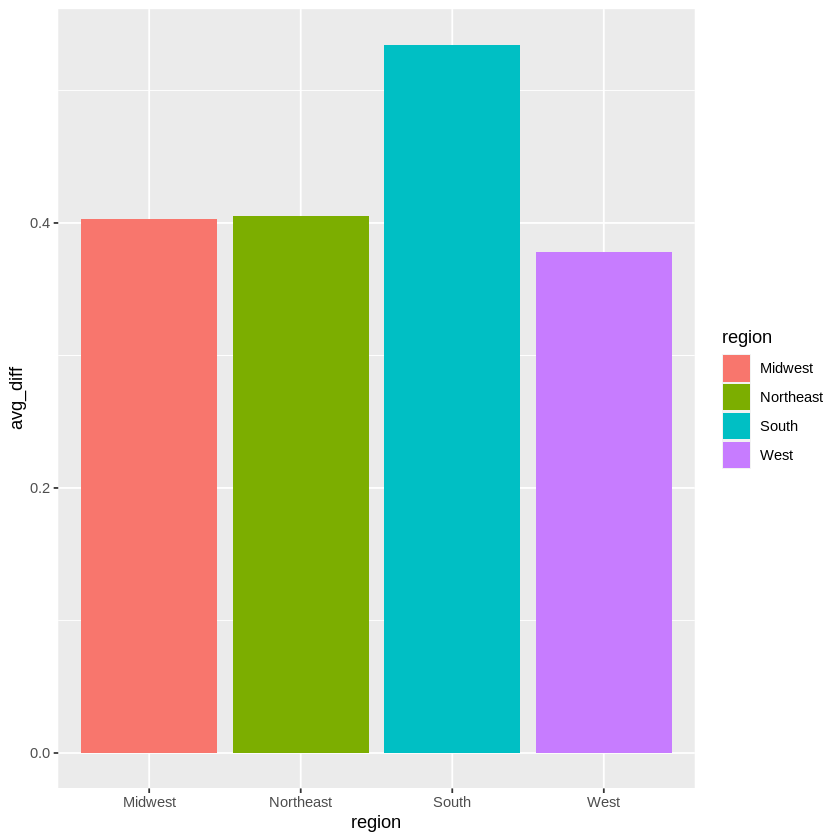

In [26]:

## Creates list of states where the % diff in gender of winning candidates is > 5% and list the difference

elections_2016 %>%
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female")) %>%
    group_by(state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    head()

elections_2016 %>%
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female")) %>%
    group_by(region, state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    ungroup() %>%
    as.data.frame() %>%
    pivot_wider(id_cols = c("region", "state"), names_from = winner_gender, values_from = prop) %>%
    mutate(diff = male - female) %>%
    arrange(diff) %>%
    select(-'Other candidate')

elections_2016 %>%
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female")) %>%
    group_by(region, state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    ungroup() %>%
    as.data.frame() %>%
    pivot_wider(id_cols = c("region", "state"), names_from = winner_gender, values_from = prop) %>%
    mutate(diff = male - female) %>%
    arrange(diff) %>%
    select(-'Other candidate') %>%
    group_by(region) %>%
    summarize(avg_diff = mean(diff)) %>%
    arrange(desc(avg_diff))


# Gender proportion of winning candidates by region
elections_2016 %>%
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female")) %>%
    group_by(region, state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    ungroup() %>%
    as.data.frame() %>%
    pivot_wider(id_cols = c("region", "state"), names_from = winner_gender, values_from = prop) %>%
    mutate(diff = male - female) %>%
    arrange(diff) %>%
    select(-'Other candidate') %>%
    group_by(region) %>%
    summarize(avg_diff = mean(diff)) %>%
    arrange(desc(avg_diff)) %>%
    ggplot(aes(x = region, y = avg_diff, fill = region)) + 
        geom_bar(stat = "identity")



`summarise()` regrouping output by 'state' (override with `.groups` argument)



state,winner_gender,count,prop
<chr>,<chr>,<int>,<dbl>
Alabama,female,27,0.2000000
Alabama,male,108,0.8000000
Alaska,female,20,0.4347826
Alaska,male,26,0.5652174
Arizona,female,35,0.4069767
Arizona,male,51,0.5930233
Arkansas,female,11,0.2444444
Arkansas,male,34,0.7555556
California,female,35,0.3153153


`summarise()` regrouping output by 'region', 'state' (override with `.groups` argument)



region,state,female,male,diff
<chr>,<chr>,<dbl>,<dbl>,<dbl>
West,Colorado,0.5000000,0.5000000,0.00000000
West,Nevada,0.5000000,0.5000000,0.00000000
West,Washington,0.4642857,0.5357143,0.07142857
Northeast,Vermont,0.4411765,0.5588235,0.11764706
West,Alaska,0.4347826,0.5652174,0.13043478
West,New Mexico,0.4347826,0.5652174,0.13043478
West,Oregon,0.4324324,0.5675676,0.13513514
Northeast,Maine,0.4090909,0.5909091,0.18181818
West,Arizona,0.4069767,0.5930233,0.18604651


`summarise()` regrouping output by 'region', 'state' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



region,avg_diff
<chr>,<dbl>
Midwest,0.4685333
Northeast,0.3028204
West,0.2519538
South,NA


`summarise()` regrouping output by 'region', 'state' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“Removed 1 rows containing missing values (position_stack).”


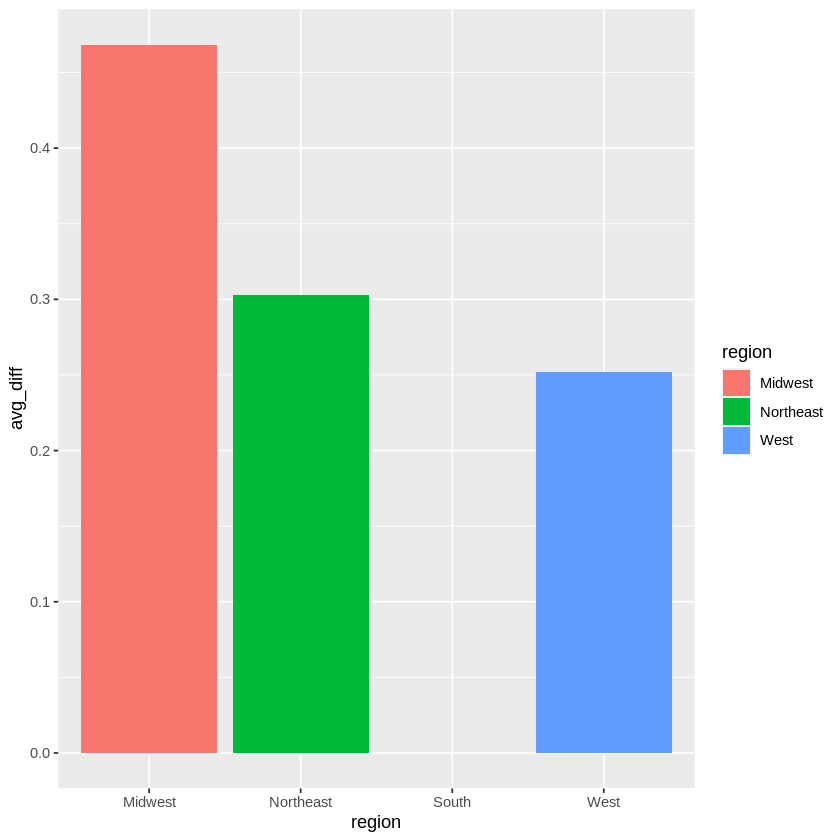

In [39]:

## Same as previous, for 2018
elections_2018 %>%
    filter(winner_gender %in% c("male", "female")) %>%
    group_by(state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count))


elections_2018 %>%
    filter(winner_gender %in% c("male", "female")) %>%
    group_by(region, state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    ungroup() %>%
    as.data.frame() %>%
    pivot_wider(id_cols = c("region", "state"), names_from = winner_gender, values_from = prop) %>%
    mutate(diff = male - female) %>%
    arrange(diff)

elections_2018 %>%
    filter(winner_gender %in% c("male", "female")) %>%
    group_by(region, state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    ungroup() %>%
    as.data.frame() %>%
    pivot_wider(id_cols = c("region", "state"), names_from = winner_gender, values_from = prop) %>%
    mutate(diff = male - female) %>%
    arrange(diff) %>%
    group_by(region) %>%
    summarize(avg_diff = mean(diff)) %>%
    arrange(desc(avg_diff))


# Gender proportion of winning candidates by region
elections_2018 %>%
    filter(winner_gender %in% c("male", "female")) %>%
    group_by(region, state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    ungroup() %>%
    as.data.frame() %>%
    pivot_wider(id_cols = c("region", "state"), names_from = winner_gender, values_from = prop) %>%
    mutate(diff = male - female) %>%
    arrange(diff) %>%
    group_by(region) %>%
    summarize(avg_diff = mean(diff)) %>%
    arrange(desc(avg_diff)) %>%
    ggplot(aes(x = region, y = avg_diff, fill = region)) + 
        geom_bar(stat = "identity")


`summarise()` regrouping output by 'year' (override with `.groups` argument)

`summarise()` regrouping output by 'year' (override with `.groups` argument)



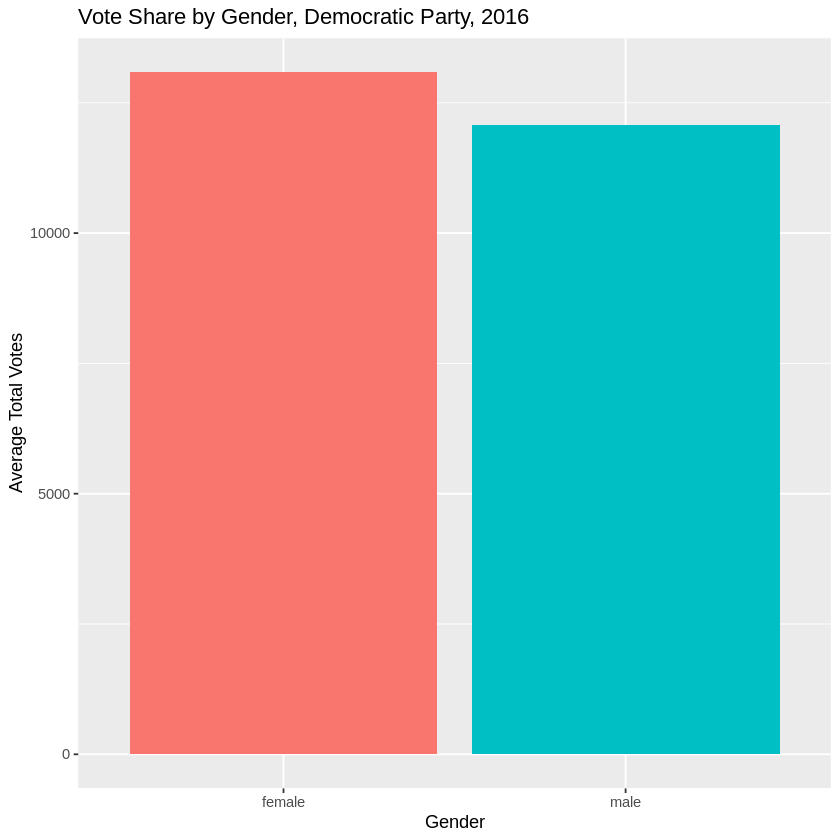

`summarise()` regrouping output by 'gender_dem', 'gender_rep' (override with `.groups` argument)



gender_dem,gender_rep,winner_party,count
<chr>,<chr>,<chr>,<int>
female,female,Democrat,67
female,female,Other,1
female,female,Republican,116
female,male,Democrat,227
female,male,Other,1
female,male,Republican,353
male,female,Democrat,111
male,female,Other,1
male,female,Republican,156


`summarise()` regrouping output by 'state' (override with `.groups` argument)



state,winner_gender,count,prop
<chr>,<chr>,<int>,<dbl>
Alaska,female,9,0.4090909
Alaska,male,13,0.5909091
Arkansas,female,4,0.1739130
Arkansas,male,19,0.8260870
California,female,13,0.2280702
California,male,44,0.7719298


`summarise()` regrouping output by 'state' (override with `.groups` argument)



state,winner_gender,count,prop
<chr>,<chr>,<int>,<dbl>
Alaska,female,9,0.4090909
Alaska,male,13,0.5909091
Arkansas,female,4,0.1739130
Arkansas,male,19,0.8260870
California,female,13,0.2280702
California,male,44,0.7719298


`summarise()` regrouping output by 'state' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



state,prop_diff
<chr>,<dbl>
Alaska,0.1818182
Arkansas,0.6521739
California,0.5438596
Colorado,0.1764706
Connecticut,0.4476190
Delaware,0.6000000


`summarise()` regrouping output by 'region', 'state' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



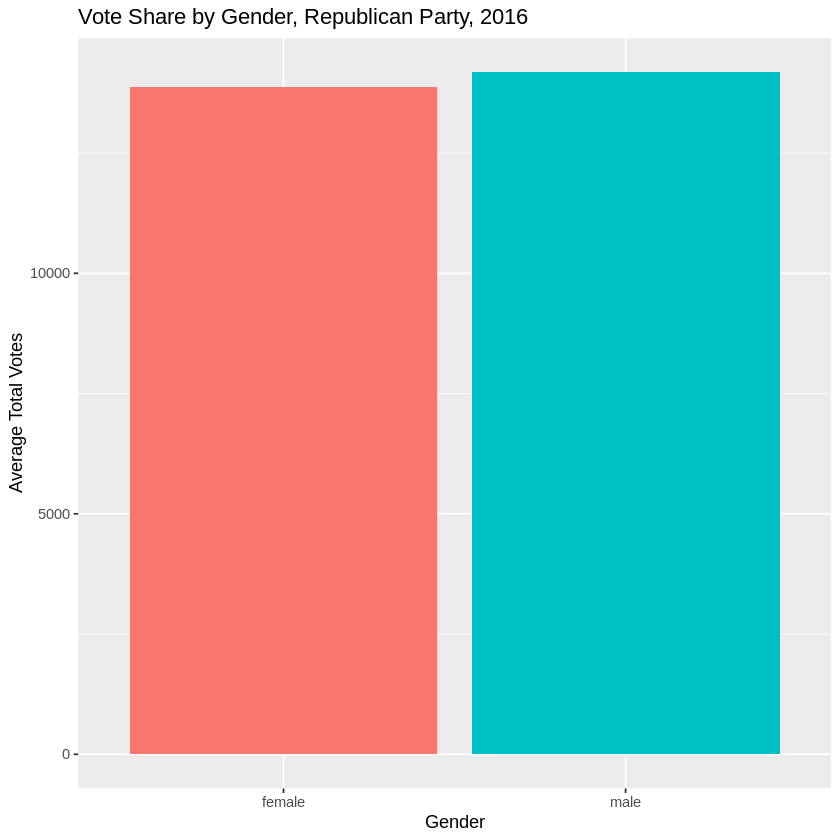

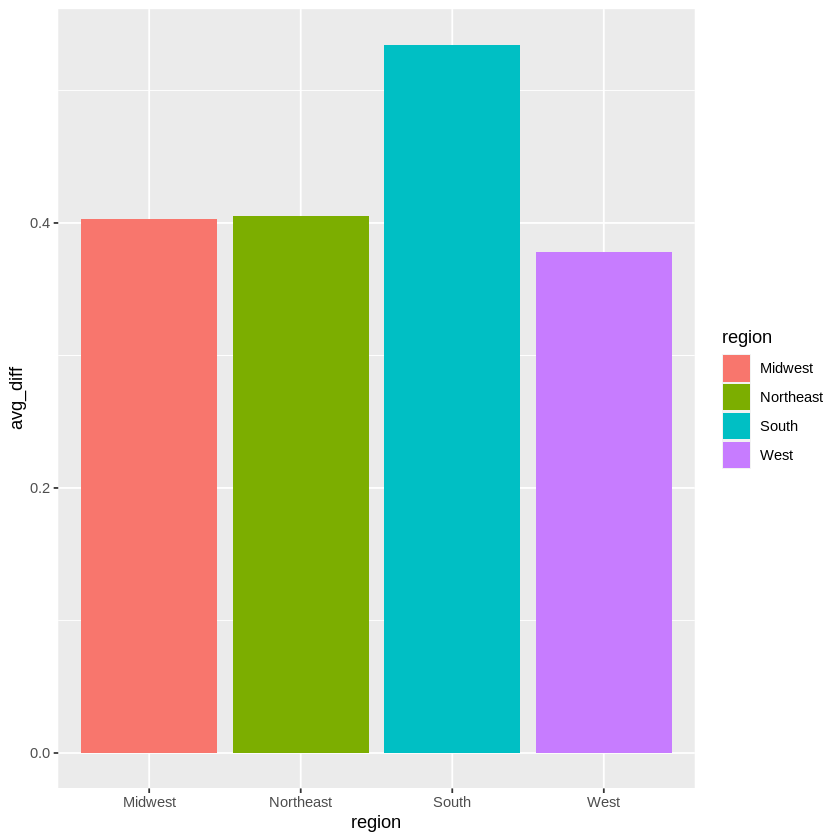

In [24]:
## Graphs (need to change vote total to vote share, vote total is bad stats), also just needs general proofreading
elections_2016 %>%
    group_by(year, gender_dem) %>%
    filter(gender_dem %in% c("male", "female"), !is.na(democrat_votes)) %>%
    summarize(count = n(), 
              mean_votes = mean(democrat_votes)) %>%
    ggplot(aes(x = gender_dem, y = mean_votes, fill = gender_dem)) + 
        geom_bar(stat = "identity") + 
        labs(title = "Vote Share by Gender, Democratic Party, 2016",
            y = "Average Total Votes",
            x = "Gender") +
        theme(legend.position = "none")

elections_2016 %>%
    group_by(year, gender_rep) %>%
    filter(gender_rep %in% c("male", "female"), !is.na(republican_votes)) %>%
    summarize(count = n(),
              mean_votes = mean(republican_votes)) %>%
    ggplot(aes(x = gender_rep, y = mean_votes, fill = gender_rep)) + 
        geom_bar(stat = "identity") +
        labs(title = "Vote Share by Gender, Republican Party, 2016",
            y = "Average Total Votes",
            x = "Gender") +
        theme(legend.position = "none")


## Tables  (need to work on this whole section, not currently working)
elections_2016 %>% 
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female")) %>%
    group_by(gender_dem, gender_rep, winner_party) %>%
    summarize(count = n())

elections_2016 %>% 
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female")) %>%
    group_by(state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    head()


##Vote Prop of winning candidates
elections_2016 %>% 
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female")) %>%
    group_by(state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    head()

elections_2016 %>% 
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female")) %>%
    group_by(state, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    summarize(prop_diff = max(prop) - min(prop)) %>% # This calculation only works with paired rows, e.g. row 1 is State A Males, row 2 is State A Females, etc. tbh prob better to do these kind of calculations with wide datasets, will look at later
    filter(abs(prop_diff) > 0.05) %>%
    head()





In [19]:
head (elections_2018_long)
head(elections_2018)

,X,year,state,district,office,Candidate,Votes,Vote.Prop,Gender,winner_party,Candidate.Party
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>
1,1,2018,Alabama,District 1,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat
2,2,2018,Alabama,District 1,State Senator,Caroline Self,15830,0.3232525,female,Republican,Democrat
3,3,2018,Alabama,District 10,State Representative,J.B. King,8565,0.4091235,Unknown,Republican,Democrat
4,4,2018,Alabama,District 10,State Senator,No candidate,0,0.0000000,N/A,Republican,Democrat
5,5,2018,Alabama,District 100,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat
6,6,2018,Alabama,District 101,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat


,X,state,district,office,candidate_other,candidate_republican,candidate_democrat,total_votes_other,total_votes_republican,total_votes_democrat,vote_share_dem,vote_share_rep,vote_share_other,winner_party,gender_democrat,gender_republican,winner_gender,year
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,1,Alabama,District 1,State Representative,Bobby James Dolan III,Phillip Pettus,No candidate,4336,7348,0,0.0000000,0.6288942,0.37110579,Republican,N/A,male,male,2018
2,2,Alabama,District 1,State Senator,No candidate,Tim Melson,Caroline Self,0,33141,15830,0.3232525,0.6767475,0.00000000,Republican,female,male,male,2018
3,3,Alabama,District 10,State Representative,Elijah J. Boyd,Mike Ball,J.B. King,1130,11240,8565,0.4091235,0.5368999,0.05397659,Republican,Unknown,male,male,2018
4,4,Alabama,District 10,State Senator,Craig Ford,Andrew Jones,No candidate,16759,25902,0,0.0000000,0.6071588,0.39284124,Republican,N/A,male,male,2018
5,5,Alabama,District 100,State Representative,No candidate,Victor Gaston,No candidate,0,12086,0,0.0000000,1.0000000,0.00000000,Republican,N/A,male,male,2018
6,6,Alabama,District 101,State Representative,No candidate,Chris Pringle,No candidate,0,10274,0,0.0000000,1.0000000,0.00000000,Republican,N/A,male,male,2018


In [95]:
elections_2018_long%>% 
    filter(Candidate.Party == "Democrat", Gender %in% c("male", "female"), Vote.Prop !=1)%>%
    group_by(Gender)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) 


elections_2016_long %>%
 filter(Candidate.Party == "Democrat", Gender %in% c("male", "female"), Vote.Prop !=1)%>%
    group_by(Gender)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) 


#overall vote.prop averages for Dem candidates by gender in races which weren't unopposed

`summarise()` ungrouping output (override with `.groups` argument)



Gender,mean_gen_prop
<chr>,<dbl>
female,0.4959815
male,0.4984242


`summarise()` ungrouping output (override with `.groups` argument)



Gender,mean_gen_prop
<chr>,<dbl>
female,0.4770327
male,0.4688065


In [96]:
elections_2018_long%>% 
    filter(Candidate.Party == "Republican", Gender %in% c("male", "female"), Vote.Prop !=1)%>%
    group_by(Gender)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) 

elections_2016_long %>%
filter(Candidate.Party == "Republican", Gender %in% c("male", "female"), Vote.Prop !=1)%>%
    group_by(Gender)  %>%
summarise (mean_gen_prop= mean(Vote.Prop)) 
#overall vote.prop averages for Repub candidates by gender in races which weren't unopposed
#2016 numbers off or would these higher props be due to other party candidates?

`summarise()` ungrouping output (override with `.groups` argument)



Gender,mean_gen_prop
<chr>,<dbl>
female,0.4846782
male,0.5174242


`summarise()` ungrouping output (override with `.groups` argument)



Gender,mean_gen_prop
<chr>,<dbl>
female,0.5332860
male,0.5482527


In [97]:
elections_2018_long%>% 
    filter(Gender %in% c("male", "female"), Vote.Prop !=1)%>%
    group_by(Gender)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) 

elections_2016_long%>% 
    filter(Gender %in% c("male", "female"), Vote.Prop !=1)%>%
    group_by(Gender)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) 


#overall props by gender regardless of party
#highers props due to other party candidates?

`summarise()` ungrouping output (override with `.groups` argument)



Gender,mean_gen_prop
<chr>,<dbl>
female,0.4922897
male,0.5099602


`summarise()` ungrouping output (override with `.groups` argument)



Gender,mean_gen_prop
<chr>,<dbl>
female,0.4983212
male,0.5132029


In [98]:
elections_2018_long%>% 
    filter(Gender %in% c("female"), Vote.Prop !=1)%>%
    group_by(state)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) %>% head()

elections_2018_long%>% 
    filter(Candidate.Party == "Democrat", Gender %in% c("female"), Vote.Prop !=1)%>%
    group_by(state)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) %>% head()

elections_2018_long%>% 
    filter(Candidate.Party == "Republican", Gender %in% c("female"), Vote.Prop !=1)%>%
    group_by(state)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) %>% head()


#average voting props for women candidates grouped by state
elections_2016_long%>% 
    filter(Gender %in% c("female"), Vote.Prop !=1)%>%
    group_by(State)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) %>% head()

elections_2016_long%>% 
    filter(Candidate.Party == "Democrat", Gender %in% c("female"), Vote.Prop !=1)%>%
    group_by(State)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) %>% head()

elections_2016_long%>% 
    filter(Candidate.Party == "Republican", Gender %in% c("female"), Vote.Prop !=1)%>%
    group_by(State)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) %>% head()

#was hoping to find differences in vote prop for women candidates by state between 2016 and 2018, splitting into parties as well
#is there a way to join between corresponding 2016 and 2018 summaries, then subtracting out?

`summarise()` ungrouping output (override with `.groups` argument)



state,mean_gen_prop
<chr>,<dbl>
Alabama,0.4260917
Alaska,0.5001140
Arizona,0.4911919
Arkansas,0.4934839
California,0.4902475
Colorado,0.5134712


`summarise()` ungrouping output (override with `.groups` argument)



state,mean_gen_prop
<chr>,<dbl>
Alabama,0.3569806
Alaska,0.4412298
Arizona,0.4784230
Arkansas,0.4236310
California,0.5509966
Colorado,0.5468281


`summarise()` ungrouping output (override with `.groups` argument)



state,mean_gen_prop
<chr>,<dbl>
Alabama,0.7124091
Alaska,0.5861756
Arizona,0.5160577
Arkansas,0.5866211
California,0.3943279
Colorado,0.4546060


`summarise()` ungrouping output (override with `.groups` argument)



State,mean_gen_prop
<chr>,<dbl>
Alaska,0.4671111
Arkansas,0.4528645
California,0.4902361
Colorado,0.5264582
Connecticut,0.5081141
Delaware,0.4445916


`summarise()` ungrouping output (override with `.groups` argument)



State,mean_gen_prop
<chr>,<dbl>
Alaska,0.3447284
Arkansas,0.3560999
California,0.5698057
Colorado,0.5197604
Connecticut,0.5109482
Delaware,0.4456568


`summarise()` ungrouping output (override with `.groups` argument)



State,mean_gen_prop
<chr>,<dbl>
Alaska,0.5612517
Arkansas,0.5818840
California,0.3672649
Colorado,0.5355200
Connecticut,0.5036783
Delaware,0.4427276


In [94]:
elections_2018_long%>% 
    filter(Gender %in% c("female"), Vote.Prop !=1)%>%
    group_by(district)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) %>% head()

#idea was to use process above (if someone finds it), and use at district level as well
#does this make sense at this level as something to find?


`summarise()` ungrouping output (override with `.groups` argument)



district,mean_gen_prop
<chr>,<dbl>
Addison-1,0.6559154
Addison-2,0.7564767
Addison-3,0.6562926
Addison-4,0.7061595
Addison-5,0.6430793
Addison-Rutland,0.4981745


In [11]:

reg <- lm (Vote.Prop~ Candidate.Party+state+district+ Gender, elections_2018_long  %>% filter (Gender %in% c("male", "female"), Vote.Prop !=1))
tidy (reg)

#regression looking at effect of gender on voting share in 2018

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.4866956761,0.123553350,3.939154026,0.0000825866
Candidate.PartyRepublican,0.0129965288,0.004162066,3.122614713,0.0018000394
stateAlaska,-0.0116466787,0.025973678,-0.448403142,0.6538765469
stateArizona,-0.0013909628,0.022170101,-0.062740479,0.9499750057
stateArkansas,0.0131634747,0.024571804,0.535714624,0.5921732980
stateCalifornia,0.0088461672,0.020820103,0.424885852,0.6709333185
stateColorado,-0.0053154948,0.022366892,-0.237650127,0.8121596205
stateConnecticut,0.0001215066,0.018161038,0.006690508,0.9946619827
stateDelaware,0.0019992624,0.026274626,0.076090995,0.9393489407


In [13]:
reg <- lm (Vote.Prop~ Candidate.Party+State+District+ Gender,elections_2016_long  %>% filter (Gender %in% c("male", "female"), Vote.Prop !=1))
library (broom)
tidy (reg)

#regression for 2016

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.485669915,0.038748395,12.5339362,2.440616e-35
Candidate.PartyRepublican,0.074642139,0.005381575,13.8699429,1.059260e-42
StateArkansas,0.044402357,0.033946092,1.3080256,1.909443e-01
StateCalifornia,0.016664237,0.029336513,0.5680374,5.700434e-01
StateColorado,0.007487220,0.029687920,0.2521975,8.009021e-01
StateConnecticut,0.023959306,0.027609330,0.8677974,3.855604e-01
StateDelaware,0.044900262,0.037803907,1.1877149,2.350205e-01
StateFlorida,0.027355819,0.029486755,0.9277324,3.536057e-01
StateGeorgia,0.009197543,0.034289920,0.2682288,7.885379e-01


In [14]:
reg <- lm (Vote.Prop~ Candidate.Party+State+District+ Incumbent+ Gender,elections_2016_long  %>% filter (Gender %in% c("male", "female"), Vote.Prop !=1))
library (broom)
tidy (reg)

#regression for 2016, with incumbent added

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.4127464886,0.029398287,14.039814206,1.099872e-43
Candidate.PartyRepublican,0.0336158825,0.004151624,8.097043344,7.527533e-16
StateArkansas,0.0450817673,0.025726447,1.752351058,7.979473e-02
StateCalifornia,0.0021100149,0.022234724,0.094897285,9.244015e-01
StateColorado,0.0068810963,0.022499341,0.305835456,7.597468e-01
StateConnecticut,0.0149753994,0.020924744,0.715678964,4.742339e-01
StateDelaware,0.0097597350,0.028657840,0.340560738,7.334533e-01
StateFlorida,0.0319839833,0.022347054,1.431239349,1.524445e-01
StateGeorgia,-0.0038556273,0.025988190,-0.148360747,8.820660e-01


In [18]:
 ttest_2018_Dem_filtered<- elections_2018_long%>% 
    filter(Candidate.Party == "Democrat", Gender %in% c("male", "female"), Vote.Prop !=1)

t.test (Vote.Prop ~ Gender,data= ttest_2018_Dem_filtered)

#did a bunch of t tests for 2018 and 2016


	Welch Two Sample t-test

data:  Vote.Prop by Gender
t = -0.43515, df = 3651.2, p-value = 0.6635
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.013448914  0.008563379
sample estimates:
mean in group female   mean in group male 
           0.4959815            0.4984242 


In [21]:
 ttest_2018_Rep_filtered<- elections_2018_long%>% 
    filter(Candidate.Party == "Republican", Gender %in% c("male", "female"), Vote.Prop !=1)

t.test (Vote.Prop ~ Gender,data= ttest_2018_Rep_filtered)



	Welch Two Sample t-test

data:  Vote.Prop by Gender
t = -5.1406, df = 1379.6, p-value = 3.132e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.04524211 -0.02024992
sample estimates:
mean in group female   mean in group male 
           0.4846782            0.5174242 


In [22]:
 ttest_2018_overall_filtered<- elections_2018_long%>% 
    filter(Gender %in% c("male", "female"), Vote.Prop !=1)

t.test (Vote.Prop ~ Gender,data= ttest_2018_overall_filtered)


	Welch Two Sample t-test

data:  Vote.Prop by Gender
t = -4.3804, df = 5428.1, p-value = 1.207e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.025578680 -0.009762343
sample estimates:
mean in group female   mean in group male 
           0.4922897            0.5099602 


In [24]:
 ttest_2016_Dem_filtered<- elections_2016_long%>% 
    filter(Candidate.Party == "Democrat", Gender %in% c("male", "female"), Vote.Prop !=1)

t.test (Vote.Prop ~ Gender,data= ttest_2016_Dem_filtered)


	Welch Two Sample t-test

data:  Vote.Prop by Gender
t = 1.1019, df = 1721.3, p-value = 0.2707
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.006416586  0.022868805
sample estimates:
mean in group female   mean in group male 
           0.4770327            0.4688065 


In [25]:
 ttest_2016_Repub_filtered<- elections_2016_long%>% 
    filter(Candidate.Party == "Republican", Gender %in% c("male", "female"), Vote.Prop !=1)

t.test (Vote.Prop ~ Gender,data= ttest_2016_Repub_filtered)


	Welch Two Sample t-test

data:  Vote.Prop by Gender
t = -1.8863, df = 877.03, p-value = 0.05958
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0305390292  0.0006057485
sample estimates:
mean in group female   mean in group male 
           0.5332860            0.5482527 


In [26]:
 ttest_2016_overall_filtered<- elections_2016_long%>% 
    filter(Gender %in% c("male", "female"), Vote.Prop !=1)

t.test (Vote.Prop ~ Gender,data= ttest_2016_overall_filtered)


	Welch Two Sample t-test

data:  Vote.Prop by Gender
t = -2.7023, df = 2604.6, p-value = 0.00693
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.025680245 -0.004083171
sample estimates:
mean in group female   mean in group male 
           0.4983212            0.5132029 
